In [5]:
from gurobipy import *
from math import factorial
import pandas as pd
import time
import numpy as np
from matplotlib import pyplot as plt

In [6]:
coord = {}
for i in range(1,189):
    if i < 33:
        coord[i] = [1,i]
    elif i < 65:
        coord[i] = [2,i-32]
    elif i < 96:
        coord[i] = [3,i-64]
    elif i < 127:
        coord[i] = [5,i-95]
    elif i < 158:
        coord[i] = [6,i-126]
    elif i < 189:
        coord[i] = [7,i-157]
d = {}
for i in range(1,189):
    for j in range(1,189):
        d[i,j] = abs(coord[i][0] - coord[j][0]) + abs(coord[i][1]-coord[j][1])

In [7]:
df = pd.read_excel (r'BD SEAT .xlsx')
df2 = df.dropna()
lim = 10

values = df2['UnitDesignator'].value_counts()[0:lim]
courses = values.keys()
#plt.bar(courses, values, color = 'darkblue')
#plt.xlabel("Seats")
#plt.ylabel("Number of times purchased")
#plt.title("Top 10 most purchased seats")
#plt.show()
maximo = max(df2['UnitDesignator'].value_counts())
normalizado = df2['UnitDesignator'].value_counts()/maximo


#plt.bar(normalizado.index[0:10],normalizado[0:10], color = 'darkblue')
#plt.xlabel("Seats")
#plt.ylabel("Seat rank")
#plt.title("Top 10 most purchased seats")
#plt.show()


vec = {}
for i in range(0, len(normalizado.index)):
    if len(normalizado.index[i]) == 2 :
        if normalizado.index[i][-1] == 'A':
            vec[int(normalizado.index[i][0])] = 1
        elif normalizado.index[i][-1] == 'B':
            vec[int(normalizado.index[i][0])+32] = 1
        elif normalizado.index[i][-1] == 'C':
            vec[int(normalizado.index[i][0])+32+32] = 1
        elif normalizado.index[i][-1] == 'D':
            vec[int(normalizado.index[i][0])+32+32+31] = 1
        elif normalizado.index[i][-1] == 'E':
            vec[int(normalizado.index[i][0])+32+32+31+31] = 1
        elif normalizado.index[i][-1] == 'F':
            vec[int(normalizado.index[i][0])+32+32+31+31+31] = 1
            
    elif len(normalizado.index[i]) == 3 :
        if normalizado.index[i][-1] == 'A':
            vec[int(normalizado.index[i][0:2])] = 1
        elif normalizado.index[i][-1] == 'B':
            vec[int(normalizado.index[i][0:2])+32] = 1
        elif normalizado.index[i][-1] == 'C':
            vec[int(normalizado.index[i][0:2])+32+32] = 1
        elif normalizado.index[i][-1] == 'D':
            vec[int(normalizado.index[i][0:2])+32+32+31] = 1
        elif normalizado.index[i][-1] == 'E':
            vec[int(normalizado.index[i][0:2])+32+32+31+31] = 1
        elif normalizado.index[i][-1] == 'F':
            vec[int(normalizado.index[i][0:2])+32+32+31+31+31] = 1
            
            
contador = -1
for i in vec.keys():
    contador += 1
    vec[i] = normalizado.values[contador]
    
    
    
df3 = df[df['DepartureDate'] == '2022-06-08']
df4 = df3[df3['FlightNumber'] == 59421]
qReal = df4['RecordLocator'].value_counts()

In [46]:
I = range(1,189) #188 sillas entones el range(1,189)

c = {}
a = {}
for i in I:
    a[i] = 1
    #c[i] = 1
vecc = [39,34,34,34,34,27,27,27,27,27,27,29,29,18,18,18,18,18,18,18,18,18,18,14,14,14,14,14,14,14,14,14]
vec2 = [34,29,29,29,29,22,22,22,22,22,22,24,24,12,12,12,12,12,12,12,12,12,12,9,9,9,9,9,9,9,9,9]


for i in range(0,32):
    c[i+1] = vecc[i]
    c[i+33] = vec2[i]
    if i != 31:
        c[i+65] = vecc[i]
        c[i+96] = vecc[i]
        c[i+127] = vec2[i]
        c[i+158] = vecc[i]
  

costoReal = c.copy()
        
bono = 100
for i in c:
    if i != 32:
        c[i] = c[i] + bono*vec[i]
    
c[32] = 500
c[64] = 500
c[31] = 500
c[63] = 500
c[95] = 500
c[126] = 500
c[157] = 500
c[188] = 500
c[31] = 500
c[62] = 500
c[94] = 500
c[125] = 500   
c[156] = 500
c[187] = 500  
        
    
q = 6
qR = []
for i in qReal:
    qR.append(i)



if q > 1:
    fact = math.factorial(q)/(math.factorial(q-2))#*math.factorial(2))
else:
    fact = 0
   


beta = {}
delta = 6
for i in range(1,189):
    for j in range(1,189):
        if d[i,j] >= delta:
            beta[i,j] = 1
        else:
            beta[i,j] = 0        

In [47]:
sortedC = dict(sorted(c.items(), key=lambda x:x[1]))

cntr = 0
indexes = []
for i in reversed(sortedC):
    if cntr <= len(c)*0.8-1:
        a[i] = 0
        indexes.append(i)
    cntr += 1
indexes = list(reversed(indexes))

In [48]:
seats = {}
tInicial = time.time()

### Regla del balance
### Flujo de una reserva a una sillax
### Maximizar distancia (casi hecho)x
### Escribir un txt que muestre las sillas ocupadas y la iteración que fueron seleccionadas

### Parámetro binario para el rango de distancias (beta)x
### Agregar pesos en la función objetivox
### Revisar que las variables y[i,j] estén dando bienx


### Como algunas veces con la restricción del beta, el problema puede dar infactible, debido a que 
### no hay sillas para tener dicho mínimo de distancia, se debe relajar ese constraint. (Si el problema da inf)x


### Generar grafo y usar notación en el escritox
### El modelo tiene 1 grafo: 1 para yij que conecta sillas con sillas y el flujo es la distancia y costox


### Solución para el tiempo? Cuando la persona oprima el botón de check in, el modelo empieza a correr y la silla le llega al correo cuando el modelo haya terminado


### Tal vez vale más la pena darle un peso mayor al precio de la sillax



### Hacer escenarios para q[k] fijos i.e. 1, 2, 3 y 4x
### Crear un vector de q[k] con un vuelo especifico (datos) para probar tiempo computacional en un escenario realx
### Asignar un precio "bono" base y multiplicar por la frecuencia de compra normalizadax
### Gráficas de tiempo contra iteración para un q fijox
### Tiempos para diferentes qs
### Agregar un contador de veces que se relaja el parámetro de distanciax
### Realizar las recomendaciones de David
### Como trabajo futuro, sintonizar parámetros beta y deltax
### Como trabajo futuro, tener en cuenta la ventas futuras (check ins) para x
### Como trabajo futuro, ajustar a una distribución el número de personas por reserva para hacer mejores simulacionesx





### Se puede revisar primero si es infactible. Si lo es se, relaja el parámetro delta hasta que vuelva a ser factible
### Para un q dinámico, se puede reestablecer el parámetro delta a 7 si es relajado.
### Actualizar assignemnt con parámetro delta = 7 y gráficas, etc.

### Frontera eficiente de Pareto
### Modificar parámetros solver Gurobi (MIR, heuristics, )


timee = {}
contBeta = 0
t = 0
OFS = {}
superCounter = 0
while sum(a.values()) > 0:
    tIter = time.time()
    print(sum(a.values()))
    t = t + 1
    
    q = qR[t-1]
    if q > 1:
        fact = math.factorial(q)/(math.factorial(q-2))#*math.factorial(2))
    else:
        fact = 0
        
    
    
    m = Model("Proyecto: "+str(t))

    # Variable de decisión
    x = {(i):m.addVar(vtype=GRB.BINARY, obj = 1.8*c[i], name="x"+str(i)) for i in I}
    y = {(i,j):m.addVar(vtype=GRB.BINARY, obj = -1.5*d[i,j], name="y"+str(i)+str(j)) for i in I for j in I if j!=i}



    # Restricciones
    for i in I:
        #(1c)
        m.addConstr(x[i] <= 1)
        #(1d)
        m.addConstr(x[i] <= a[i])
        # propios
        m.addConstr(x[i]*(q-1) == quicksum(y[i,m] for m in I if m!=i))
        m.addConstr(x[i]*(q-1) == quicksum(y[m,i] for m in I if m!=i))

        
        for j in I:
            if i!=j:
                m.addConstr(y[i,j] <= beta[i,j])
        
    
        
    m.addConstr(quicksum(x[i] for i in I) == q)
    
        #(1i)
    m.addConstr(quicksum(y[j,i] for j in I for i in I if j!=i) == fact)
    
    

    
    m.ModelSense = 1 # Para minimizar
    
    
   
    m.setParam("OutputFlag",0)
    m.setParam('Heuristics', 0)
    m.setParam('Threads', 8)
    m.setParam("DualReductions",0)
    m.setParam("InfUnbdInfo", 1)
    m.setParam('MIPGap', 0.10)
    m.setParam('NodeLimit', 10000)
    m.setParam("TimeLimit", 1000)
    
    m.optimize()
    if m.Status == 9:
        print('Time limit')
    
    #print(m.Status)
    if m.Status == 3 and delta >= 1: # Si el problema es infactible, se relaja la restricción de distancia
        
        t = t - 1
        contBeta += 1
        delta = delta - 1
        for i in range(1,189):
            for j in range(1,189):
                if d[i,j] >= delta:
                    beta[i,j] = 1
                else:
                    beta[i,j] = 0
    else:
        
        #if t%20==0:# and q!=1:
        #print("Iteration: " + str(t))
            #timee.append((time.time()-tIter)/60)
        timee[t] = round((time.time()-tIter)/60,4)
        OFS[t] = m.objVal
        #print('Time for iteration: ' + str(timee[t]))
        #OF = m.objVal


        vals = { k : v.X for k,v in x.items() }
        for b in vals:
            if vals[b] == 1:
                a[b] = 0
                seats[b] = t
                
        if superCounter <= len(indexes):
            for i in indexes[superCounter:superCounter + q]:
                a[i] = 1


            superCounter += q
        
                
                
            
            
tTotal = round(time.time() - tInicial,5)  


38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39


IndexError: list index out of range

In [49]:
len(seats)

94

In [50]:
seats

{13: 1,
 92: 1,
 100: 1,
 106: 1,
 179: 1,
 45: 2,
 85: 2,
 105: 2,
 123: 2,
 162: 2,
 75: 3,
 87: 3,
 112: 3,
 170: 3,
 93: 4,
 108: 4,
 116: 4,
 131: 4,
 69: 5,
 136: 5,
 180: 5,
 11: 6,
 84: 6,
 102: 6,
 185: 6,
 5: 7,
 90: 7,
 148: 7,
 168: 7,
 28: 8,
 37: 8,
 111: 8,
 60: 9,
 81: 9,
 135: 9,
 82: 10,
 99: 10,
 154: 10,
 74: 11,
 118: 11,
 139: 11,
 76: 12,
 115: 12,
 107: 13,
 117: 13,
 73: 14,
 149: 14,
 77: 15,
 124: 15,
 50: 16,
 137: 16,
 43: 17,
 122: 17,
 91: 18,
 103: 18,
 72: 19,
 174: 19,
 114: 20,
 167: 20,
 44: 21,
 113: 21,
 42: 22,
 119: 22,
 30: 23,
 104: 23,
 10: 24,
 143: 24,
 55: 25,
 138: 25,
 88: 26,
 130: 26,
 83: 27,
 109: 27,
 12: 28,
 121: 28,
 142: 29,
 110: 30,
 80: 31,
 176: 32,
 18: 33,
 147: 34,
 79: 35,
 169: 36,
 173: 37,
 145: 38,
 19: 39,
 178: 40,
 146: 41,
 86: 42,
 171: 43,
 134: 44,
 120: 45,
 166: 46,
 49: 47}

In [51]:
costo1 = sum(c[i] for i in seats.keys())
print('Costo: ',round(costo1, 2))
dist1 = sum(d[i,j] for i in seats.keys() for j in seats.keys() if i != j)
print('Distancia: ', round(dist1, 2))

OF1 = 1.8*costo1-1.5*dist1
print('Objective Function: ', OF1)

costoReal1 = sum(costoReal[i] for i in seats.keys())
print('Costo real: ',round(costoReal1, 2))

Costo:  4870.14
Distancia:  90236
Objective Function:  -126587.74285714286
Costo real:  1933


In [52]:
timeInSeconds = []
for i in timee.keys():
    timeInSeconds.append(timee[i]*60)
time1 = timeInSeconds

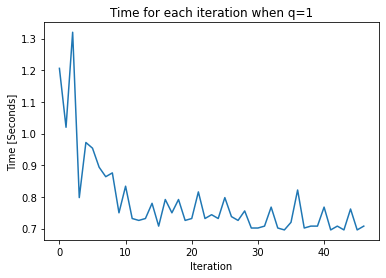

In [53]:
plt.xlabel("Iteration")
plt.ylabel("Time [Seconds]")
plt.title("Time for each iteration when q=" +str(q))# q=" + str(q))
plt.plot(time1)


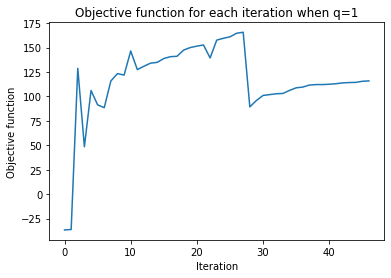

In [54]:
plt.xlabel("Iteration")
plt.ylabel("Objective function")
plt.title("Objective function for each iteration when q=" + str(q))
plt.plot(OFS.values())
OF111 = OFS.values()

In [ ]:
I = range(1,189) #188 sillas entones el range(1,189)

c = {}
a = {}
for i in I:
    a[i] = 1
    #c[i] = 1
vecc = [39,34,34,34,34,27,27,27,27,27,27,29,29,18,18,18,18,18,18,18,18,18,18,14,14,14,14,14,14,14,14,14]
vec2 = [34,29,29,29,29,22,22,22,22,22,22,24,24,12,12,12,12,12,12,12,12,12,12,9,9,9,9,9,9,9,9,9]


for i in range(0,32):
    c[i+1] = vecc[i]
    c[i+33] = vec2[i]
    if i != 31:
        c[i+65] = vecc[i]
        c[i+96] = vecc[i]
        c[i+127] = vec2[i]
        c[i+158] = vecc[i]
        
        
bono = 100
for i in c:
    if i != 32:
        c[i] = c[i] + bono*vec[i]
    
c[32] = 500
c[64] = 500
c[31] = 500
c[63] = 500
c[95] = 500
c[126] = 500
c[157] = 500
c[188] = 500
c[31] = 500
c[62] = 500
c[94] = 500
c[125] = 500   
c[156] = 500
c[187] = 500   
        
    
q = 4
qR = []
for i in qReal:
    qR.append(i)



if q > 1:
    fact = math.factorial(q)/(math.factorial(q-2))#*math.factorial(2))
else:
    fact = 0
   


beta = {}
delta = 6
for i in range(1,189):
    for j in range(1,189):
        if d[i,j] >= delta:
            beta[i,j] = 1
        else:
            beta[i,j] = 0  

In [ ]:
import sys
import gurobipy as gp
from gurobipy import GRB

def mycallback(model, where):
    #if where == GRB.Callback.PRESOLVE:
        # Presolve callback
        #cdels = model.cbGet(GRB.Callback.PRE_COLDEL)
        #rdels = model.cbGet(GRB.Callback.PRE_ROWDEL)
        #if cdels or rdels:
            #print('%d columns and %d rows are removed' % (cdels, rdels))
    if where == GRB.Callback.MIP:
        # General MIP callback
        nodecnt = model.cbGet(GRB.Callback.MIP_NODCNT)
        objbst = model.cbGet(GRB.Callback.MIP_OBJBST)
        objbnd = model.cbGet(GRB.Callback.MIP_OBJBND)
        solcnt = model.cbGet(GRB.Callback.MIP_SOLCNT)
        if nodecnt - model._lastnode >= 100:
            model._lastnode = nodecnt
            actnodes = model.cbGet(GRB.Callback.MIP_NODLFT)
            itcnt = model.cbGet(GRB.Callback.MIP_ITRCNT)
            cutcnt = model.cbGet(GRB.Callback.MIP_CUTCNT)
            #print('%d %d %d %g %g %d %d' % (nodecnt, actnodes,
            #      itcnt, objbst, objbnd, solcnt, cutcnt))
        if abs(objbst - objbnd) < 0.1 * (1.0 + abs(objbst)):
            #print('Stop early - 10% gap achieved')
            model.terminate()
        if nodecnt >= 10000 and solcnt:
            #print('Stop early - 10000 nodes explored')
            model.terminate()
    elif where == GRB.Callback.MIPSOL:
        # MIP solution callback
        nodecnt = model.cbGet(GRB.Callback.MIPSOL_NODCNT)
        obj = model.cbGet(GRB.Callback.MIPSOL_OBJ)
        solcnt = model.cbGet(GRB.Callback.MIPSOL_SOLCNT)
        x = model.cbGetSolution(model._vars)
        #print('**** New solution at node %d, obj %g, sol %d, '
        #      'x[0] = %g ****' % (nodecnt, obj, solcnt, x[0]))






In [ ]:
tInicial = time.time()
t = 0
timee = {}
contBeta = 0
t = 0
OFS = {}

gp.setParam('OutputFlag', 0)
gp.setParam('Heuristics', 0)
seats = {}
contador = 0
while sum(a.values()) > 0:
    tIter = time.time()
    t = t + 1
    q = qR[t-1]
    
    
    if q > 1:
        fact = math.factorial(q)/(math.factorial(q-2))#*math.factorial(2))
    else:
        fact = 0
    
    
    
    m = Model("Proyecto: "+str(t))

    # Variable de decisión
    x = {(i):m.addVar(vtype=GRB.BINARY, obj = 1.8*c[i], name="x"+str(i)) for i in I}
    y = {(i,j):m.addVar(vtype=GRB.BINARY, obj = -1.5*d[i,j], name="y"+str(i)+str(j)) for i in I for j in I if j!=i}



    # Restricciones
    for i in I:
        
        m.addConstr(x[i] <= 1)
        
        m.addConstr(x[i] <= a[i])
        
        m.addConstr(x[i]*(q-1) == quicksum(y[i,m] for m in I if m!=i))
        m.addConstr(x[i]*(q-1) == quicksum(y[m,i] for m in I if m!=i))

        
        for j in I:
            if i!=j:
                m.addConstr(y[i,j] <= beta[i,j])
        
    
        
    m.addConstr(quicksum(x[i] for i in I) == q)
    
        
    m.addConstr(quicksum(y[j,i] for j in I for i in I if j!=i) == fact)
    
    
    m.ModelSense = 1 # Para minimizar
    m.setParam('Threads', 8)
    m.setParam("OutputFlag",0)
    m.setParam("DualReductions",0)
    m.update()



            
    if len(sys.argv) < 2:
        print('Usage: callback.py filename')
        sys.exit(0)
    
    model = m

    
    logfile = open('cb.log', 'w')

    # Pass data into my callback function

    model._lastiter = -GRB.INFINITY
    model._lastnode = -GRB.INFINITY
    model._logfile = logfile
    model._vars = model.getVars()



    model.optimize(mycallback)


    if m.Status == 3 and delta >= 1: # Si el problema es infactible, se relaja la restricción de distancia

        t = t - 1
        contBeta += 1
        delta = delta - 1
        for i in range(1,189):
            for j in range(1,189):
                if d[i,j] >= delta:
                    beta[i,j] = 1
                else:
                    beta[i,j] = 0
                
    else:


        timee[t] = round((time.time()-tIter)/60,4)
        OFS[t] = m.objVal

        vals = { k : v.X for k,v in x.items() }
        contador += 1
        for b in vals:
            if vals[b] > 0.5:
                a[b] = 0
                seats[b] = contador
                #print(b, a[b], contador)
            

In [ ]:
len(seats)

In [ ]:
costo2 = sum(c[i] for i in seats.keys())
print('Costo: ',round(costo2, 2))
dist2 = sum(d[i,j] for i in seats.keys() for j in seats.keys() if i != j)
print('Distancia: ', round(dist2, 2))

OF2 = 1.8*costo2-1.5*dist2
print('Objective Function: ', OF2)

costoReal2 = sum(costoReal[i] for i in seats.keys())
print('Costo real: ', costoReal2)

In [ ]:
print(costo1,costo2)
print(dist1, dist2)
print(OF1, OF2)
print(costoReal1, costoReal2)

In [ ]:
seats

In [ ]:
timeInSeconds = []
for i in timee.keys():
    timeInSeconds.append(timee[i]*60)

In [ ]:
plt.xlabel("Iteration")
plt.ylabel("Time [Seconds]")
plt.title("Time for each iteration when  q=" + str(q))
plt.plot(timeInSeconds)

In [ ]:
plt.xlabel("Iteration")
plt.ylabel("Objective function")
plt.title("Objective function for each iteration when q=" + str(q))
plt.plot(OFS.values())

In [ ]:
plt.plot(time1, 'r', label = 'Without callbacks') 
plt.plot(timeInSeconds, 'b', label = 'With callbacks')
plt.xlabel("Iteration")
plt.ylabel("Time [Seconds]")
plt.title("Time for each iteration when  q=" + str(q))
plt.legend()
plt.show()


In [ ]:
plt.plot(OF111, 'r', label = 'Without callbacks') 
plt.plot(OFS.values(), 'b', label = 'With callbacks')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
plt.title("Objective function for each iteration when q=" + str(q))
plt.legend()
plt.show()